# Solving linear equations in Python

## 1. Using the matrix method 


Here is a simple example of a system of linear equations:

$$3x + y - 2z = 6$$

$$x + 2y + z = 1$$

$$2x - y - z = 1$$

An easy way to solve these equations is using matrices. In this Jupyter Notebook we show how this can be done.

Solving these equations by using matrices can be done as follows:


$$
\left(\begin{array}{cc} 
3 & 1 & -2\\
1 & 2 & 1\\
2 & -1 & -1
\end{array}\right)
*
\left(\begin{array}{cc} 
x\\ 
y\\
z
\end{array}\right)
=
\left(\begin{array}{cc} 
6\\ 
1\\
1
\end{array}\right)
$$


We can create these matrices using the numpy function `np.array()`, like this:

In [57]:
import numpy as np

A = np.array([[3, 1, -2],
              [1, 2, 1],
              [2, -1, -1]])
b = np.array([6, 
              1, 
              1])

print('matrix A =\n', A)
print('\nmatrix b =\n', b)

matrix A =
 [[ 3  1 -2]
 [ 1  2  1]
 [ 2 -1 -1]]

matrix b =
 [6 1 1]


The solutions for $x$, $y$ and $z$ can be easily calculated using the `np.linalg.solve()` function:

In [58]:
x, y, z = np.linalg.solve(A,b)

print('x =', x)
print('y =', y)
print('z =', z)

x = 0.1999999999999996
y = 1.4000000000000004
z = -2.0000000000000004


## 2. Using the Python package `sympy`


An easier way to solve multiple linear equations is using the `sympy` package. Let's try this method on the same linear equations problem:

$$3x + y - 2z = 6$$

$$x + 2y + z = 1$$

$$2x - y - z = 1$$

First, you have to insert all variables that need to be solved using the function `sp.symbols`, which are the variables $x$, $y$ and $z$.

In [59]:
import sympy as sp

x, y, z = sp.symbols(['x', 'y', 'z'])

Second, you can just plainly type the equations you want to solve into a list.

In [60]:
equations_list = [sp.Eq(3*x + y - 2*z, 6), sp.Eq(x + 2*y + z, 1), sp.Eq(2*x - y - z, 1)]
equations_list

[Eq(3*x + y - 2*z, 6), Eq(x + 2*y + z, 1), Eq(2*x - y - z, 1)]

Third, you can insert the `equations_list` and the symbols that need to be solved into the function `sp.linsolve()` to solve the equations.

In [61]:
solutions = sp.linsolve(equations_list, [x, y, z])
print('x = ', tuple(solutions)[0][0])
print('y = ', tuple(solutions)[0][1])
print('z = ', tuple(solutions)[0][2])

x =  1/5
y =  7/5
z =  -2


## 3. Water flow example

### Small aquifer system

Partial differential equations are often used to define moisture/water flow in porous medium. The approximate form of calculating water flow can be developed into a system of linear equations:

$∆h =h_{i+1}-h_{i}$

$∆2h = ∆(h_{i+1} - h_{i}) = h_{i+2} - 2h_{i+1} + h_{i}$ in $x$ direction

$∆2h = ∆(h_{j+1} - h_{j}) = h_{j+2} - 2h_{j+1} + h_{j}$ in $y$ direction	

Let's say we have this hypothetical aquifer system: 

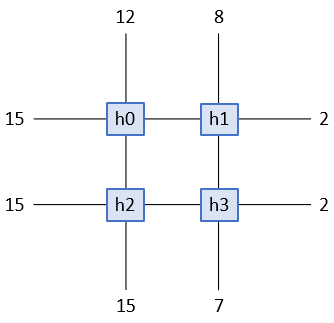

The nodes h0 - h3 have to be calculated, which can be done by using the following formulas:

Formula for h0: &emsp; $15 - 2h_{0} + h_{1} + h_{2} - 2h_{0} + 12 = 0$ &emsp; &rarr; &emsp; $h_{2} - 4h_{0} + h_{1} = -27$

Formula for h1: &emsp; $h_{3} - 2h_{1} + 8 + h_{0} - 2h_{1} + 2 = 0$ &emsp; &rarr; &emsp; $h_{3} + h_{0} - 4h_{1} = -10$

Formula for h2: &emsp; $15 - 2h_{2} + h_{3} + 15 - 2h_{2} + h_{0} = 0$ &emsp; &rarr; &emsp; $-4h_{2} + h_{3} + h_{0} = -30$

Formula for h3: &emsp; $h_{2} + 2h_{3} + 2 + 7 - 2h_{3} + h_{1} = 0$ &emsp; &rarr; &emsp; $h_{2} - 4h_{3} + h_{1} = -9$

These formulas could be inserted by hand using the `sympy` package as shown above. However, when the water flow needs to be calculated for a larger area with more nodes, inserting the formulas by hand is too laborious. Therefore, we need another method to solve this. Here, we show an example of how to create and solve many equations in a fast way.

### Large aquifer system

Let's say we now have the following aquifer system:

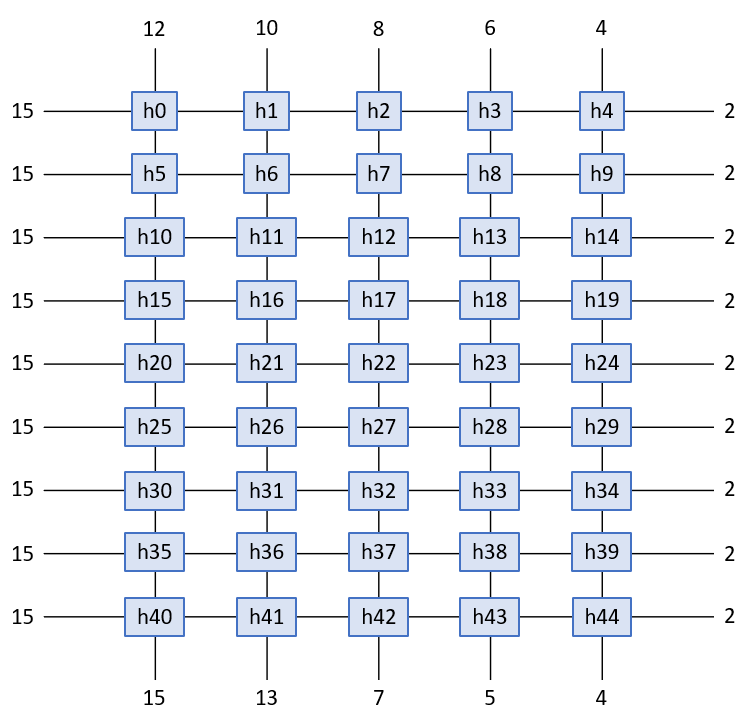

Now we have to create and solve the formulas for 45 nodes. Doing this by hand would take too much time.

The first step is to create an array that represents the aquifer system. This is done by the following code:

In [21]:
import numpy as np
import sympy as sp

left = [15] * 9                                                               # Set the left boundary values
right = [2] * 9                                                               # Set the right boundary values
top = [12, 10, 8, 6, 4]                                                       # Set the top boundary values
bottom = [15, 13, 7, 5, 4]                                                    # Set the bottom boundary values

dims = (len(left), len(top))                                                  # Calculate the array's dimensions
num = dims[0] * dims[1]                                                       # Calculate the number of nodes

symbolarray = np.array(sp.symbols('h:'+str(num))).reshape(dims)                  # Create an array with all nodes as symbols

aq_system = np.insert(symbolarray, dims[1], right, axis=1)                    # Add the right boundary values to the array
aq_system = np.insert(aq_system, 0, left, axis=1)                             # Add the left boundary values to the array
aq_system = np.insert(aq_system, dims[0], [np.nan]+bottom+[np.nan], axis=0)   # Add the bottom boundary values to the array
aq_system = np.insert(aq_system, 0, [np.nan]+top+[np.nan], axis=0)            # Add the top boundary values to the array

aq_system

array([[nan, 12, 10, 8, 6, 4, nan],
       [15, h0, h1, h2, h3, h4, 2],
       [15, h5, h6, h7, h8, h9, 2],
       [15, h10, h11, h12, h13, h14, 2],
       [15, h15, h16, h17, h18, h19, 2],
       [15, h20, h21, h22, h23, h24, 2],
       [15, h25, h26, h27, h28, h29, 2],
       [15, h30, h31, h32, h33, h34, 2],
       [15, h35, h36, h37, h38, h39, 2],
       [15, h40, h41, h42, h43, h44, 2],
       [nan, 15, 13, 7, 5, 4, nan]], dtype=object)

Secondly, we need to create the equations for each node. This is done by using the general equation for each node, conbining the equations for the $x$ and $y$ directions:

$h_{i+2} - 2h_{i+1} + h_{i} + h_{j+2} - 2h_{j+1} + h_{j}$

This results in a long list of 45 equations:

In [22]:
equations_list = []

for coord1 in np.arange(dims[0]) + 1:                                         # Go over rows
    for coord2 in np.arange(dims[1]) + 1:                                     # Go over columns
        
        equation = (aq_system[coord1, coord2-1] - 2*aq_system[coord1, coord2] + aq_system[coord1,coord2+1] 
                   + aq_system[coord1-1, coord2] - 2*aq_system[coord1, coord2] + aq_system[coord1+1, coord2])
        full_equation = sp.Eq(equation, 0)                                    # Create the equation
        
        equations_list.append(full_equation)                                  # Add the equation to the equations list
        
equations_list

[Eq(-4*h0 + h1 + h5 + 27, 0),
 Eq(h0 - 4*h1 + h2 + h6 + 10, 0),
 Eq(h1 - 4*h2 + h3 + h7 + 8, 0),
 Eq(h2 - 4*h3 + h4 + h8 + 6, 0),
 Eq(h3 - 4*h4 + h9 + 6, 0),
 Eq(h0 + h10 - 4*h5 + h6 + 15, 0),
 Eq(h1 + h11 + h5 - 4*h6 + h7, 0),
 Eq(h12 + h2 + h6 - 4*h7 + h8, 0),
 Eq(h13 + h3 + h7 - 4*h8 + h9, 0),
 Eq(h14 + h4 + h8 - 4*h9 + 2, 0),
 Eq(-4*h10 + h11 + h15 + h5 + 15, 0),
 Eq(h10 - 4*h11 + h12 + h16 + h6, 0),
 Eq(h11 - 4*h12 + h13 + h17 + h7, 0),
 Eq(h12 - 4*h13 + h14 + h18 + h8, 0),
 Eq(h13 - 4*h14 + h19 + h9 + 2, 0),
 Eq(h10 - 4*h15 + h16 + h20 + 15, 0),
 Eq(h11 + h15 - 4*h16 + h17 + h21, 0),
 Eq(h12 + h16 - 4*h17 + h18 + h22, 0),
 Eq(h13 + h17 - 4*h18 + h19 + h23, 0),
 Eq(h14 + h18 - 4*h19 + h24 + 2, 0),
 Eq(h15 - 4*h20 + h21 + h25 + 15, 0),
 Eq(h16 + h20 - 4*h21 + h22 + h26, 0),
 Eq(h17 + h21 - 4*h22 + h23 + h27, 0),
 Eq(h18 + h22 - 4*h23 + h24 + h28, 0),
 Eq(h19 + h23 - 4*h24 + h29 + 2, 0),
 Eq(h20 - 4*h25 + h26 + h30 + 15, 0),
 Eq(h21 + h25 - 4*h26 + h27 + h31, 0),
 Eq(h22 + h26 - 4*h

Thirdly, we can solve these equations using the `sp.linsolve()` function.

In [23]:
nodes = tuple(symbolarray.flatten())
output = sp.linsolve(equations_list, nodes)

import pandas as pd
output_dataframe = pd.DataFrame({'nodes':nodes,'output':tuple(output)[0]})
output_dataframe['output'] = output_dataframe['output'].astype('float')
output_dataframe

,nodes,output
0,h0,12.486021
1,h1,10.273634
2,h2,8.164653
3,h3,6.096055
4,h4,4.044680
5,h5,12.670451
6,h6,10.443864
7,h7,8.288922
8,h8,6.174886
9,h9,4.082665
